In [88]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from scipy import stats

BCG = pd.read_csv("/Users/kwanseok/Downloads/ml_case_training_data.csv")

In [48]:
BCG4 = BCG[["churn", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1","forecast_price_energy_p2", "forecast_price_pow_p1"]]
BCG4.head()

,churn,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1
0,0,0,138.95,0.116900,0.100015,40.606701
1,0,0,6.84,0.142065,0.000000,44.311378
2,0,30,18.37,0.199230,0.000000,45.806878
3,0,0,132.11,0.110083,0.093746,40.606701
4,0,0,18.27,0.144149,0.000000,44.311378


In [59]:
(BCG4[BCG4["forecast_price_energy_p1"].isna()]== BCG4[BCG4["forecast_price_pow_p1"].isna()]).sum()

churn                       125
forecast_discount_energy    125
forecast_meter_rent_12m     125
forecast_price_energy_p1      0
forecast_price_energy_p2      0
forecast_price_pow_p1         0
dtype: int64

In [30]:
BCG.isna().sum()

id                                  0
activity_new                     9542
channel_sales                    4216
cons_12m                            0
cons_gas_12m                        0
cons_last_month                     0
no_consumption                      0
churn                               0
days_active                         0
days_since_last_modification        0
forecast_base_bill_ele          12585
forecast_base_bill_year         12585
forecast_bill_12m               12585
forecast_cons                   12585
forecast_cons_12m                   0
forecast_cons_year                  0
forecast_discount_energy            0
forecast_meter_rent_12m             0
forecast_price_energy_p1          125
forecast_price_energy_p2          125
forecast_price_pow_p1             125
has_gas                             0
imp_cons                            0
margin_gross_pow_ele                9
margin_net_pow_ele                  9
nb_prod_act                         0
net_margin  

In [17]:
BCG.describe()

,cons_12m,cons_gas_12m,cons_last_month,no_consumption,churn,days_active,days_since_last_modification,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,...,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.609200e+04,1.609200e+04,1.609200e+04,16092.000000,16092.000000,16092.000000,16092.000000,3507.000000,3507.000000,3507.000000,...,15967.000000,15967.000000,16092.000000,16092.000000,16083.000000,16083.000000,16092.000000,16081.000000,16092.000000,16092.000000
mean,1.948460e+05,3.191957e+04,1.946575e+04,0.324571,0.099118,2012.764976,1245.587870,335.939621,335.939621,3838.536089,...,0.052955,43.533582,0.184129,196.121604,22.462276,21.460318,1.347813,217.987028,5.030512,20.577385
std,6.795943e+05,1.776098e+05,8.236655e+04,0.468229,0.298829,789.137305,4665.324937,649.473833,649.473833,5426.130920,...,0.048617,5.212683,0.387601,494.416950,23.700883,27.917349,1.459973,366.742030,1.676200,21.507092
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,0.000000,0.000000,-41444.000000,-42398.000000,-364.940000,-364.940000,-2503.480000,...,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1461.000000,55.000000,0.000000,0.000000,1158.190000,...,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,1.533250e+04,0.000000e+00,9.005000e+02,0.000000,0.000000,1833.000000,732.000000,163.020000,163.020000,2187.850000,...,0.086163,44.311378,0.000000,44.395000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,5.022150e+04,0.000000e+00,4.127000e+03,1.000000,0.000000,2401.250000,1827.000000,396.190000,396.190000,4246.860000,...,0.098837,44.311378,0.000000,217.995000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,1.609711e+07,4.188440e+06,4.538720e+06,1.000000,1.000000,5925.000000,42373.000000,12566.080000,12566.080000,81122.630000,...,0.195975,59.444710,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [31]:
BCG4.describe()

,churn,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1
count,16092.000000,16092.000000,16092.000000,15967.000000,15967.000000,15967.000000
mean,0.099118,0.984029,70.317043,0.135901,0.052955,43.533582
std,0.298829,5.142086,79.027395,0.026254,0.048617,5.212683
min,0.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184
25%,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701
50%,0.000000,0.000000,19.440000,0.142881,0.086163,44.311378
75%,0.000000,0.000000,131.470000,0.146348,0.098837,44.311378
max,1.000000,50.000000,2411.690000,0.273963,0.195975,59.444710


In [35]:
info = [(col, 
       len(BCG4[col].unique()), # Unique 한 값이 얼마나 있을까?
       BCG4[col].isnull().sum(), # null 이 얼마나 있을까?
       BCG4[col].dtype,  # 각 col 별 dtype 은 어떻게 될까? 
       BCG4[col].unique()[:5]) for col in BCG4.columns] # top 5 값들에 대해서 분석
df_info = pd.DataFrame(info , columns=['name', 'num_of_unique', 'num_of_nan', 'type', 'front5_values'])
df_info

,name,num_of_unique,num_of_nan,type,front5_values
0,churn,2,0,int64,"[0, 1]"
1,forecast_discount_energy,14,0,int64,"[0, 30, 24, 28, 19]"
2,forecast_meter_rent_12m,3938,0,float64,"[138.95, 6.84, 18.37, 132.11, 18.27]"
3,forecast_price_energy_p1,618,125,float64,"[0.1169, 0.142065, 0.19923, 0.110083, 0.144149]"
4,forecast_price_energy_p2,413,125,float64,"[0.100015, 0.0, 0.093746, 0.10175, 0.098837]"
5,forecast_price_pow_p1,47,125,float64,"[40.606701, 44.31137796, 45.80687796, 59.26637..."


In [161]:
# import pandas_profiling
# profile = BCG.profile_report()
# profile

In [162]:
# profile.to_file(output_file="BCG_profiling.html")

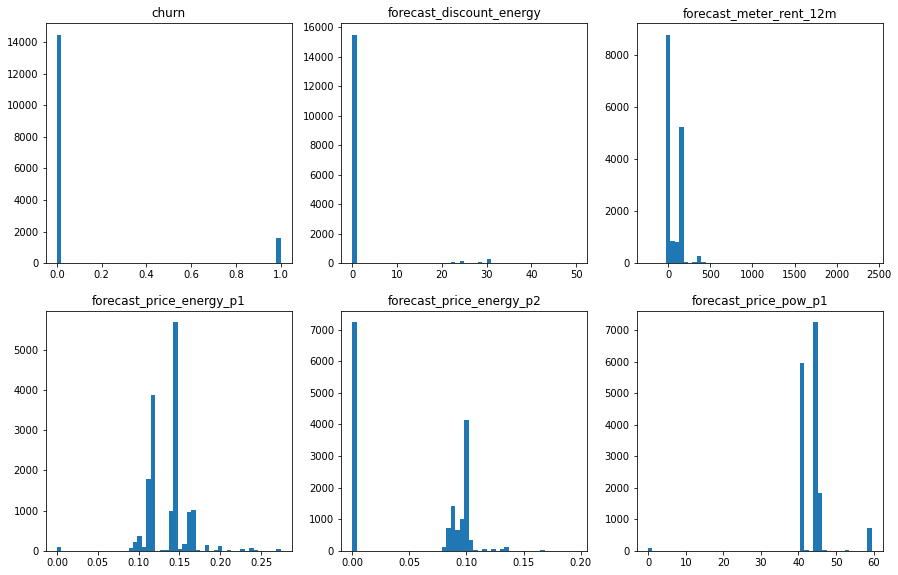

In [160]:
import matplotlib.pyplot as plt
num_df = BCG4.select_dtypes(include=[np.number]) # dataframe 의 numeric value 만 보려고 한다.
fig = int(np.ceil(np.sqrt(num_df.columns.size))) # 사이즈는 root 에 ceil function 을 넣어서 최대한 정사각 모양으로 만들었다.

plt.figure(figsize=(15,15))
for idx,col in enumerate(num_df.columns):
    plt.subplot(fig,fig,idx+1)
    plt.title(col)
    plt.hist(num_df[col], bins = 50) # 넣고싶은 plot 을 넣으면 된다.

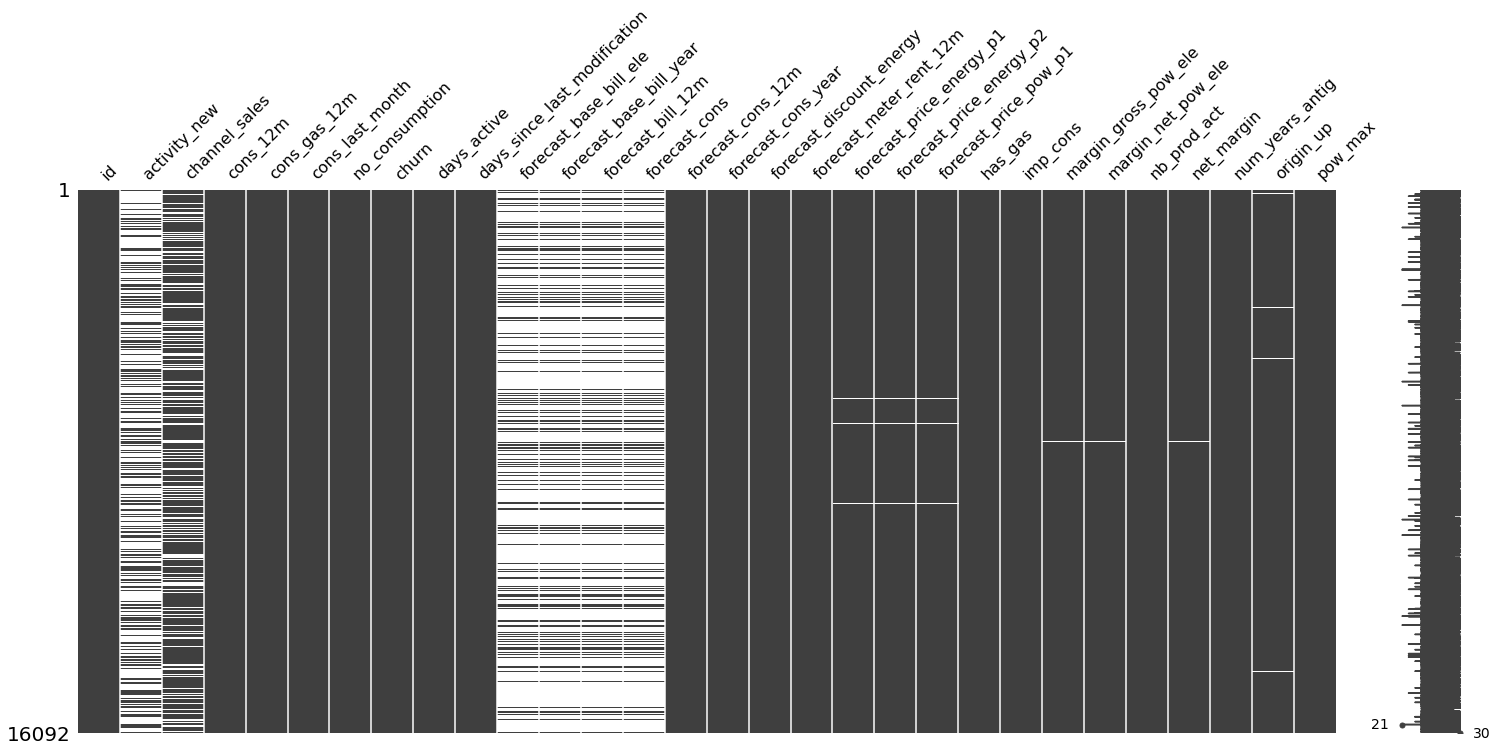

In [72]:
import missingno as msno

msno.matrix(BCG)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forecast_meter_rent_12m'>

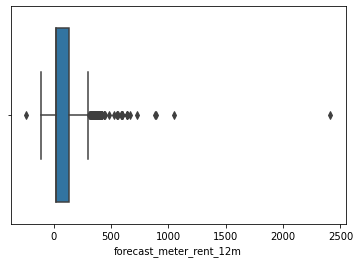

In [83]:
sns.boxplot(BCG4["forecast_meter_rent_12m"])

In [135]:
z = np.abs(stats.zscore(BCG4["forecast_meter_rent_12m"]))
np.where(z > 4) # 첫번쨰는 row, 두번쨰는 col 에 대한 outlier 를 포함하고있다.
np.where(z > 7)[0]

array([  351,  1845,  3465,  7020,  8647, 10081, 10552, 10868, 11747,
       12708, 14531])

In [111]:
BCG4.loc[np.where(z > 7)[0]]

,churn,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1
351,0,0,894.38,0.112529,0.096730,39.022007
1845,0,0,662.87,0.095022,0.086748,58.995952
3465,0,0,641.60,0.097701,0.089427,58.995952
7020,0,0,1052.39,0.095919,0.088347,58.995952
8647,0,0,641.60,0.094954,0.087382,58.995952
10081,0,0,641.60,NaN,NaN,NaN
10552,0,0,884.87,0.112529,0.096730,39.022007
10868,1,0,2411.69,0.097701,0.089427,58.995952
11747,0,0,641.60,0.095022,0.086748,58.995952
12708,0,0,725.17,0.095919,0.088347,58.995952


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forecast_price_energy_p1'>

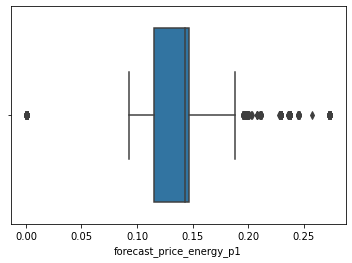

In [113]:
sns.boxplot(BCG4["forecast_price_energy_p1"])

In [134]:
z = np.abs(stats.zscore(BCG4["forecast_price_energy_p1"]))
np.where(z > 0.00001) # 첫번쨰는 row, 두번쨰는 col 에 대한 outlier 를 포함하고있다.
np.where(z > 0.1)[0]

array([], dtype=int64)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forecast_price_energy_p2'>

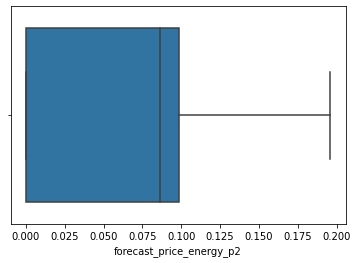

In [118]:
sns.boxplot(BCG4["forecast_price_energy_p2"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forecast_price_pow_p1'>

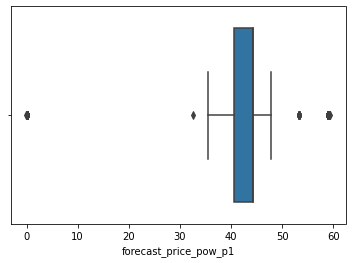

In [120]:
sns.boxplot(BCG4["forecast_price_pow_p1"])

In [139]:
z = np.abs(stats.zscore(BCG4["forecast_price_pow_p1"]))
np.where(z > 2) # 첫번쨰는 row, 두번쨰는 col 에 대한 outlier 를 포함하고있다.
np.where(z > 0.0000001)[0]

array([], dtype=int64)

In [142]:
Q1 = BCG4["forecast_price_pow_p1"].quantile(0.25)
Q3 = BCG4["forecast_price_pow_p1"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

x = BCG4["forecast_price_pow_p1"]

3.7046769600000005


In [158]:
new = BCG4.loc[np.where(BCG["forecast_price_pow_p1"]==0)]
np.where(new["churn"]==1)

(array([], dtype=int64),)